In [ ]:
import json
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'grid'])

api = wandb.Api()

In [2]:
hs = api.run('tum_daml_nicholas/ngao_zhai/o6arl15w')
hfe2 = api.run('tum_daml_nicholas/ngao_zhai/04one4y0')

In [7]:
hs = pd.DataFrame(list(hs.scan_history()))
hfe2 = pd.DataFrame(list(hfe2.scan_history()))

In [10]:
hs_e = hs['opt/E']
hfe2_e = hfe2['opt/E']

In [44]:
delta = (hs_e - hfe2_e)
dev = np.abs(delta).mean()
outlier = np.abs(delta) > 10 * dev
delta = delta[~outlier]
print(outlier.sum(), dev)

2 55.12910786723536


Text(0.5, 0, 'Optimization step')

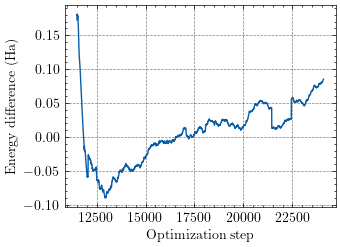

In [49]:
delta.rolling(1000).mean().plot()
plt.ylabel('Energy difference (Ha)')
plt.xlabel('Optimization step')

In [ ]:
-14